In [3]:
%cd differentiate_tabpfn/

/data/parietal/store/work/lgrinszt/differentiate_tabpfn


In [56]:
from evaluate_method_args_classif import GenericDataLoader
import openml
from sklearn.preprocessing import QuantileTransformer, LabelEncoder
import numpy as np
from synthcity.plugins import Plugins
import pandas as pd


# Load the dataset
task_id = 361060
task = openml.tasks.get_task(task_id)
dataset = task.get_dataset()
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
X = X.iloc[:, [3, 4]]

from sklearn.datasets import make_moons

# Generate the moon dataset
# X, y = make_moons(n_samples=2000, noise=0.1, random_state=42)
# # into a dataframe
# X = pd.DataFrame(X, columns=["x1", "x2"])
# y = pd.Series(y, name="target")
# X["target"] = y


# Preprocess the dataset
if X.shape[0] > 20000:
    X = X.sample(20000, random_state=42)

print(X.columns)
X = QuantileTransformer(n_quantiles=100, random_state=42).set_output(transform="pandas").fit_transform(X)

# Add target to X
X["target"] = y
# Label encode target
X["target"] = LabelEncoder().fit_transform(X["target"])

# Restrict to 2 columns
X = X.iloc[:, -3:]
print(X)
# Take 1024 random rows from X
rng = np.random.RandomState(42)
indices = rng.choice(X.index, 1024, replace=False)
X_ref = X.loc[indices]
X = X.drop(index=indices)

loader = GenericDataLoader(X, target_column="target")
loader_ref = GenericDataLoader(X_ref, target_column="target")

print("strarting")
syn_model = Plugins().get("tabpfn_points_performance", n_points_to_create=30, 
                            initialization_strategy="kmeans", lr=0.1, n_batches=100, device="cuda:0",
                            store_intermediate_data=True, n_permutations=7, n_ensembles=7)
syn_model.fit(loader)


/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/openml/tasks/functions.py:372: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  warnings.warn(
/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(
INFO:openml.datasets.dataset:pickle load data electricity
[2024-08-05T12:24:19.187140+0200][1213408][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthc

Index(['nswdemand', 'vicprice'], dtype='object')
       nswdemand  vicprice  target
10490   0.263204  0.119596       0
879     0.400851  0.616162       0
2029    0.337373  0.616162       0
35321   0.968345  0.927548       1
30529   0.218281  0.319290       1
...          ...       ...     ...
613     0.202679  0.009908       0
4126    0.368542  0.203065       0
3011    0.105660  0.009980       0
14520   0.218281  0.418057       0
225     0.064580  0.076977       0

[20000 rows x 3 columns]
strarting
encoders None
n_points_to_create 15
encoders None
X_true (9493, 2)
encoders None
X_true (9483, 2)


/scratch/lgrinszt/micromamba/envs/dpo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  1%|          | 1/100 [00:00<01:38,  1.01it/s]

Batch 0 loss: 0.6688315868377686


 11%|█         | 11/100 [00:09<01:19,  1.12it/s]

Batch 10 loss: 0.5930925607681274


 21%|██        | 21/100 [00:18<01:11,  1.11it/s]

Batch 20 loss: 0.5833340883255005


 31%|███       | 31/100 [00:27<01:02,  1.11it/s]

Batch 30 loss: 0.5843362808227539


 41%|████      | 41/100 [00:36<00:53,  1.11it/s]

Batch 40 loss: 0.5859421491622925


 51%|█████     | 51/100 [00:46<00:44,  1.10it/s]

Batch 50 loss: 0.5776073336601257


 61%|██████    | 61/100 [00:55<00:35,  1.10it/s]

Batch 60 loss: 0.5818015933036804


 71%|███████   | 71/100 [01:04<00:26,  1.10it/s]

Batch 70 loss: 0.5814318060874939


 81%|████████  | 81/100 [01:13<00:17,  1.10it/s]

Batch 80 loss: 0.5746860504150391


 91%|█████████ | 91/100 [01:22<00:08,  1.10it/s]

Batch 90 loss: 0.5814578533172607


100%|██████████| 100/100 [01:30<00:00,  1.10it/s]


In [57]:
# preprocess back all false data
for i in range(len((syn_model.all_X_false_train))):
    if syn_model.preprocessor is not None:
        syn_model.all_X_false_train[i][:, :-1] = syn_model.preprocessor.inverse_transform(syn_model.all_X_false_train[i][:, :-1])


NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING
NORMALIZING


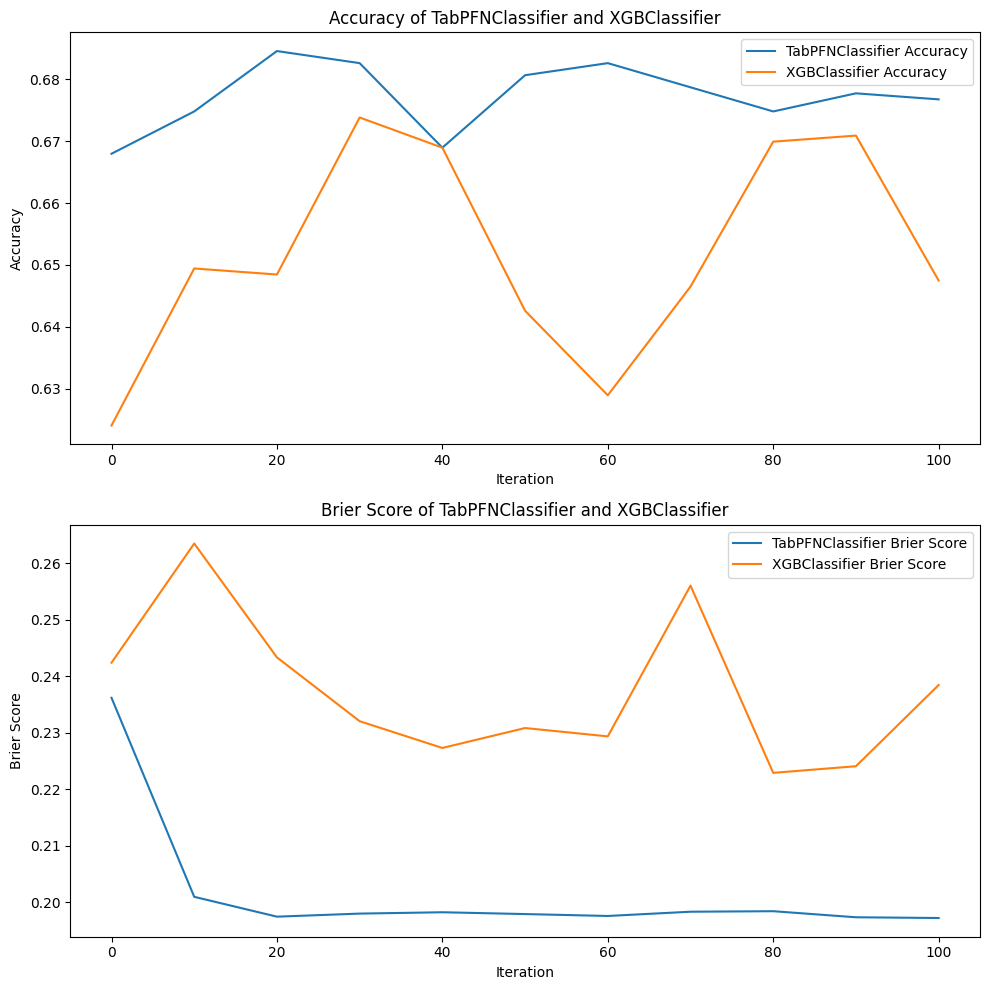

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, brier_score_loss
from xgboost import XGBClassifier
from tabpfn import TabPFNClassifier

# Initialize lists to store performance metrics
tabpfn_accuracies = []
xgb_accuracies = []
tabpfn_brier_scores = []
xgb_brier_scores = []

# Train on false data, test on true data for all i
for i in range(0, len(syn_model.all_X_false_train), 10):
    false_data = syn_model.all_X_false_train[i]
    X_false = false_data[:, :-1]
    y_false = false_data[:, -1]

    # Train TabPFNClassifier
    tabpfn_clf = TabPFNClassifier()
    tabpfn_clf.fit(X_false, y_false)
    y_pred_tabpfn = tabpfn_clf.predict(X_ref.drop(columns=["target"]))
    y_prob_tabpfn = tabpfn_clf.predict_proba(X_ref.drop(columns=["target"]))[:, 1]
    tabpfn_accuracies.append(accuracy_score(X_ref["target"], y_pred_tabpfn))
    tabpfn_brier_scores.append(brier_score_loss(X_ref["target"], y_prob_tabpfn))

    # Train XGBClassifier
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_false, y_false)
    y_pred_xgb = xgb_clf.predict(X_ref.drop(columns=["target"]))
    y_prob_xgb = xgb_clf.predict_proba(X_ref.drop(columns=["target"]))[:, 1]
    xgb_accuracies.append(accuracy_score(X_ref["target"], y_pred_xgb))
    xgb_brier_scores.append(brier_score_loss(X_ref["target"], y_prob_xgb))

# Plot the performance across i
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot accuracies
axs[0].plot(range(0, len(syn_model.all_X_false_train), 10), tabpfn_accuracies, label="TabPFNClassifier Accuracy")
axs[0].plot(range(0, len(syn_model.all_X_false_train), 10), xgb_accuracies, label="XGBClassifier Accuracy")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Accuracy of TabPFNClassifier and XGBClassifier")
axs[0].legend()

# Plot Brier scores
axs[1].plot(range(0, len(syn_model.all_X_false_train), 10), tabpfn_brier_scores, label="TabPFNClassifier Brier Score")
axs[1].plot(range(0, len(syn_model.all_X_false_train), 10), xgb_brier_scores, label="XGBClassifier Brier Score")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Brier Score")
axs[1].set_title("Brier Score of TabPFNClassifier and XGBClassifier")
axs[1].legend()

plt.tight_layout()
plt.show()


(9, 9) (9, 9)
(81,) (81,)
NORMALIZING
NORMALIZING
(9, 9) (9, 9)
(81,) (81,)


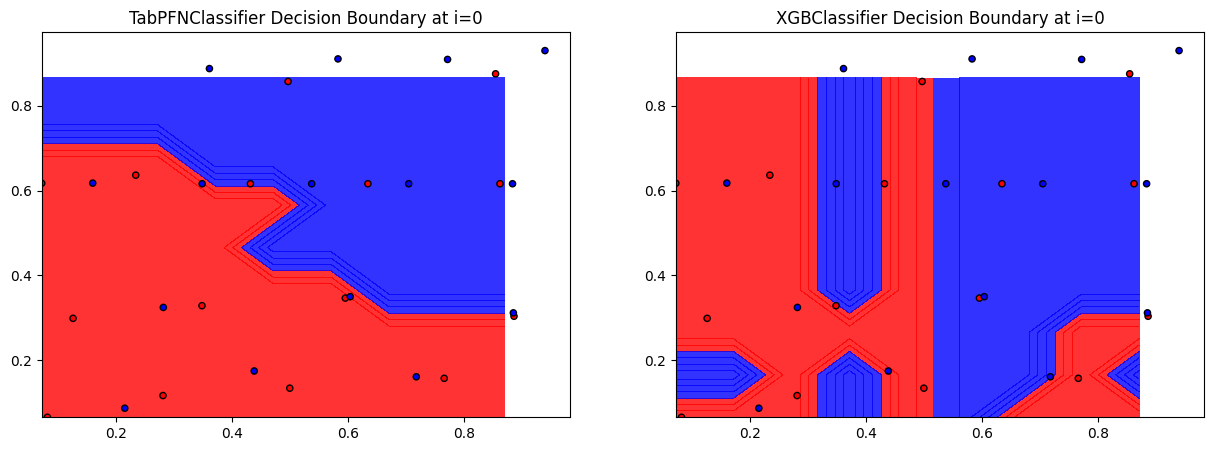

(12, 11) (12, 11)
(132,) (132,)
NORMALIZING
NORMALIZING
(12, 11) (12, 11)
(132,) (132,)


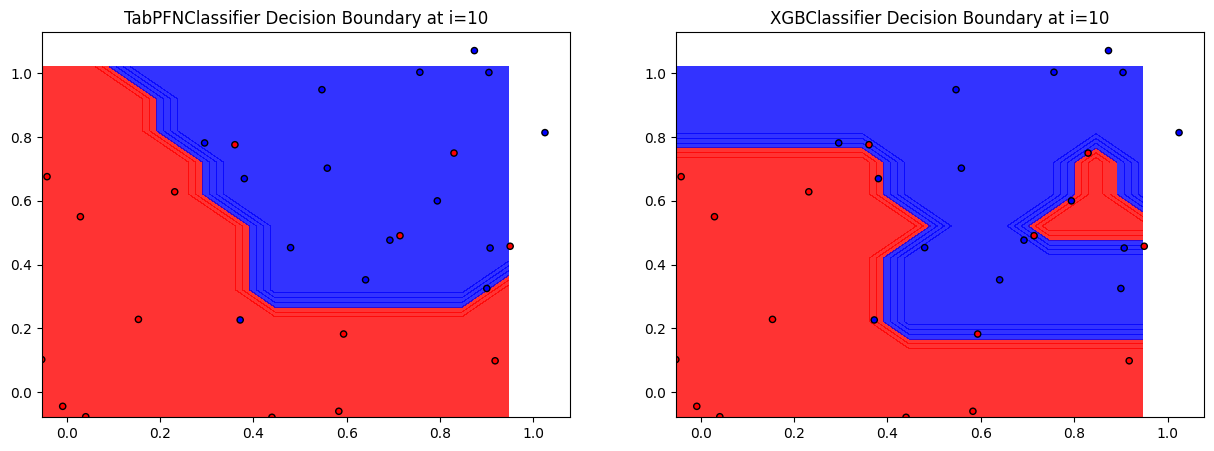

(15, 13) (15, 13)
(195,) (195,)
NORMALIZING
NORMALIZING
(15, 13) (15, 13)
(195,) (195,)


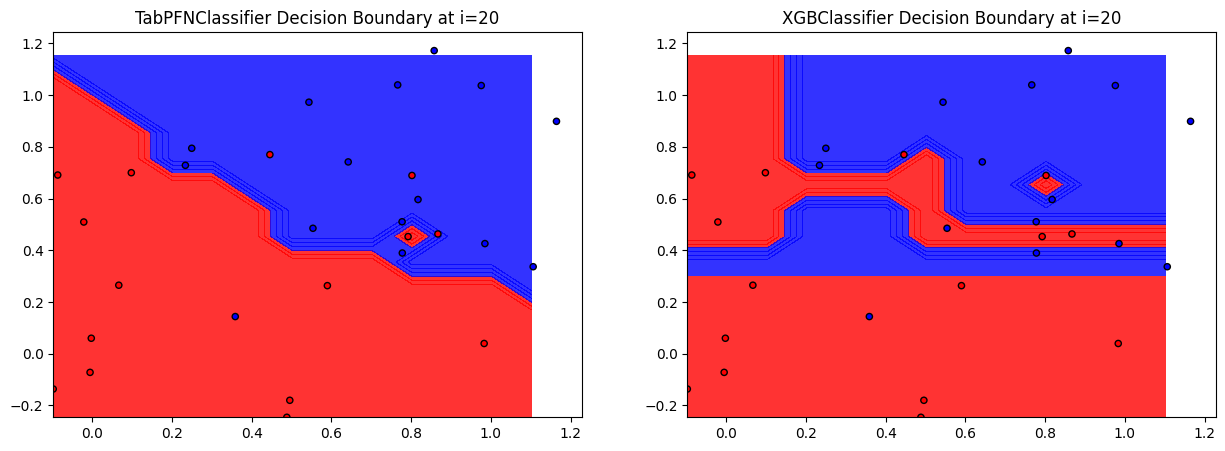

(15, 14) (15, 14)
(210,) (210,)
NORMALIZING
NORMALIZING
(15, 14) (15, 14)
(210,) (210,)


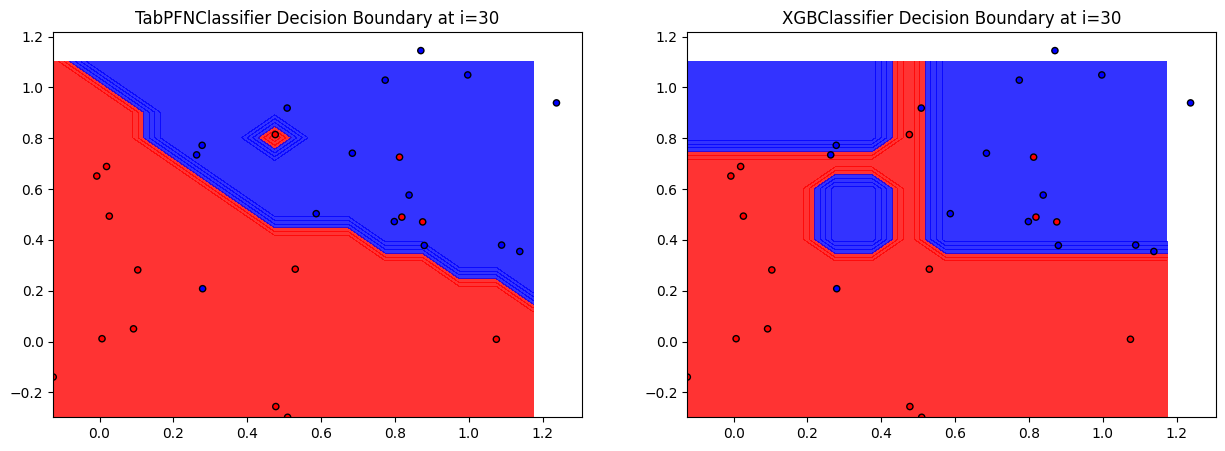

(14, 14) (14, 14)
(196,) (196,)
NORMALIZING
NORMALIZING
(14, 14) (14, 14)
(196,) (196,)


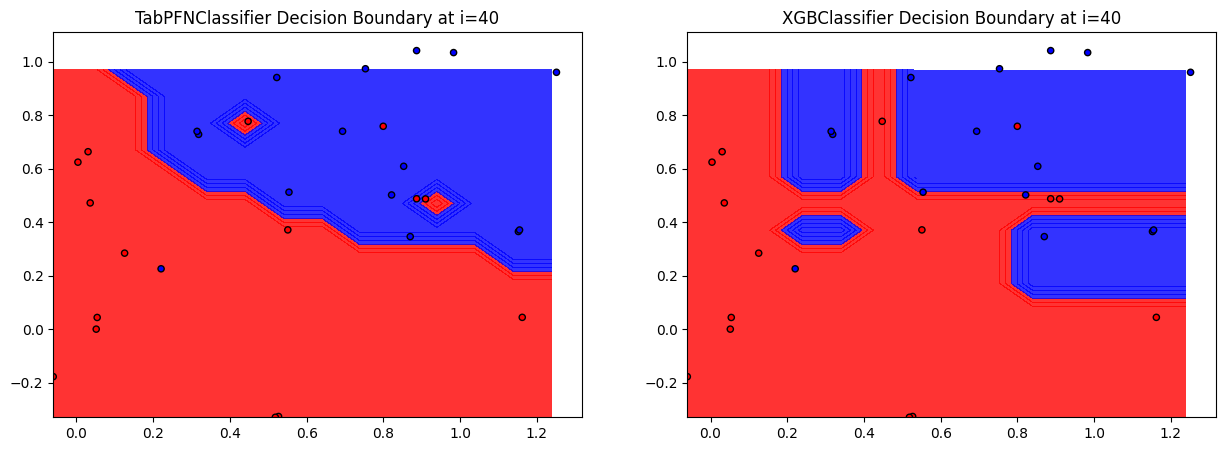

(15, 13) (15, 13)
(195,) (195,)
NORMALIZING
NORMALIZING
(15, 13) (15, 13)
(195,) (195,)


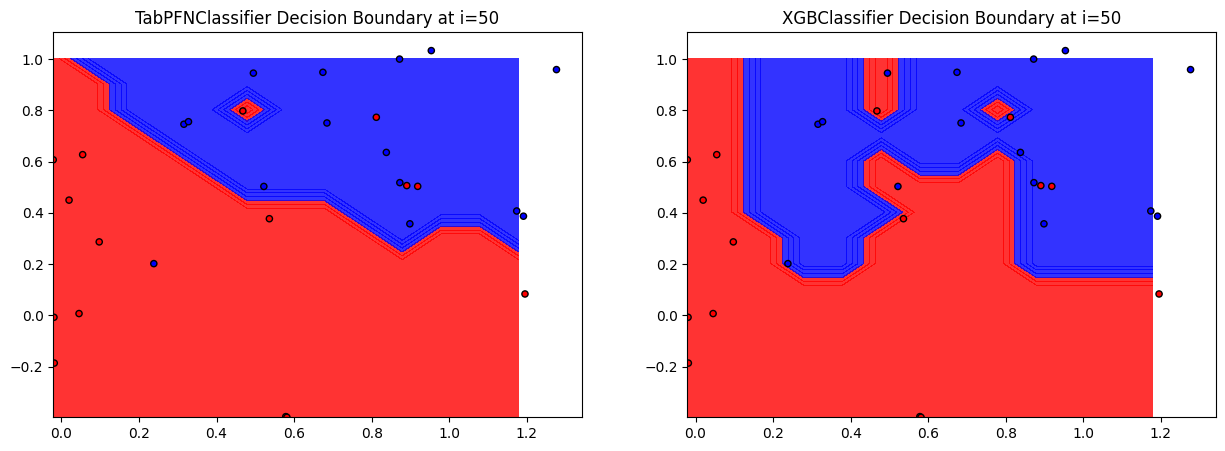

(15, 14) (15, 14)
(210,) (210,)
NORMALIZING
NORMALIZING
(15, 14) (15, 14)
(210,) (210,)


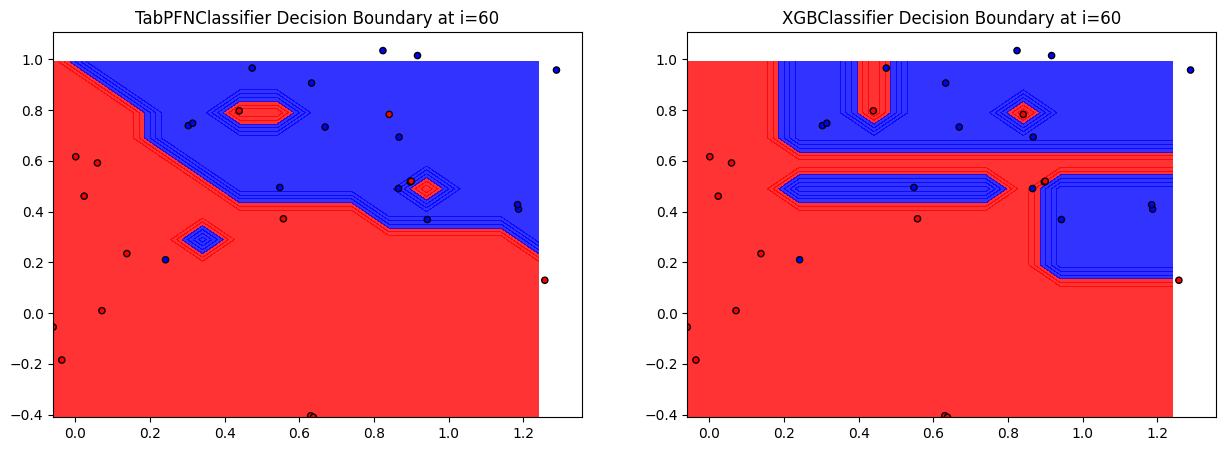

(15, 14) (15, 14)
(210,) (210,)
NORMALIZING
NORMALIZING
(15, 14) (15, 14)
(210,) (210,)


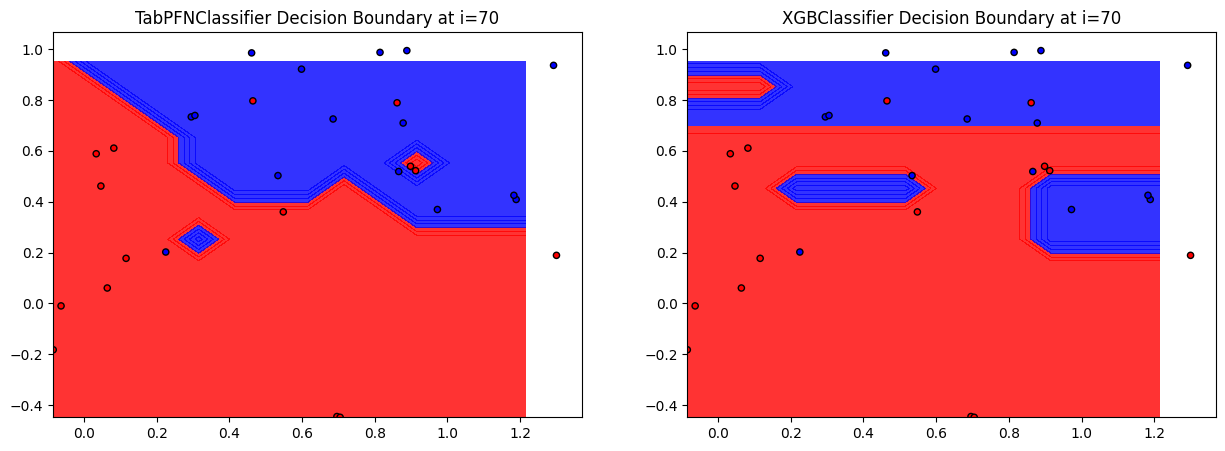

(15, 15) (15, 15)
(225,) (225,)
NORMALIZING
NORMALIZING
(15, 15) (15, 15)
(225,) (225,)


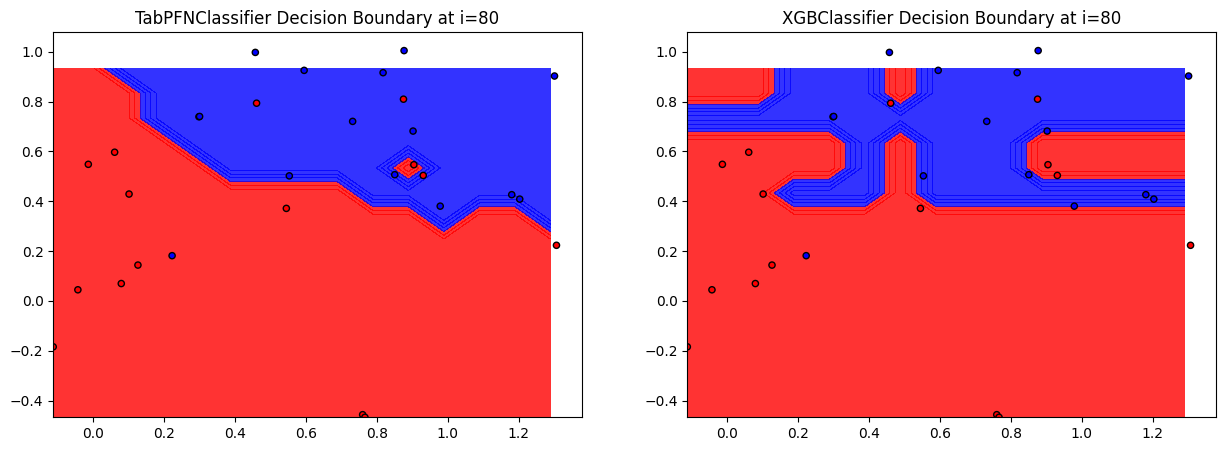

(16, 15) (16, 15)
(240,) (240,)
NORMALIZING
NORMALIZING
(16, 15) (16, 15)
(240,) (240,)


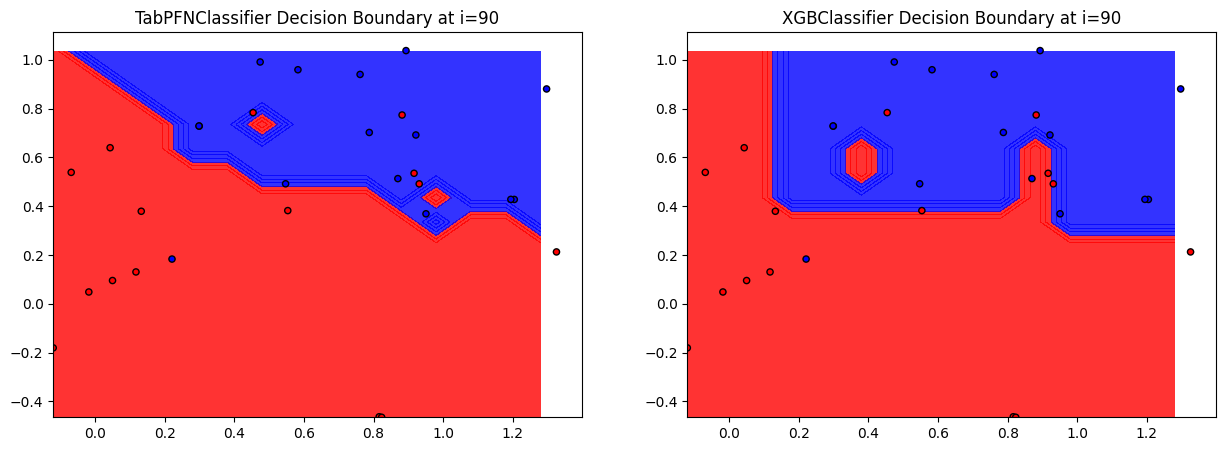

(16, 15) (16, 15)
(240,) (240,)
NORMALIZING
NORMALIZING
(16, 15) (16, 15)
(240,) (240,)


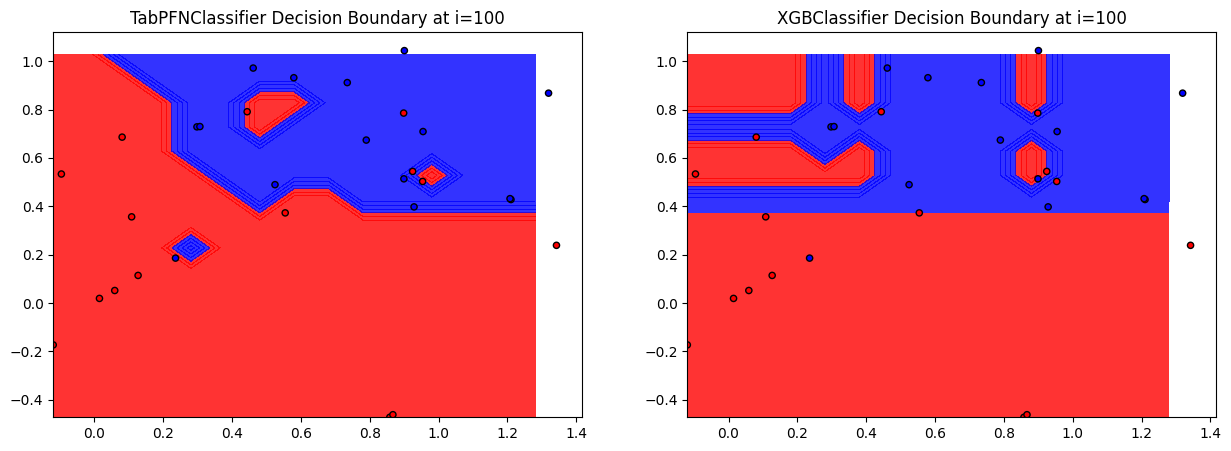

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    print(xx.shape, yy.shape)
    print(xx.ravel().shape, yy.ravel().shape)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=ListedColormap(('red', 'blue')))
    ax.set_title(title)

# Plot decision boundaries for each i
for i in range(0, len(syn_model.all_X_false_train), 10):
    false_data = syn_model.all_X_false_train[i]
    X_false = false_data[:, :-1]
    y_false = false_data[:, -1]

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Train TabPFNClassifier
    tabpfn_clf = TabPFNClassifier()
    tabpfn_clf.fit(X_false, y_false)
    plot_decision_boundary(tabpfn_clf, X_false, y_false, axs[0], f"TabPFNClassifier Decision Boundary at i={i}")

    # Train XGBClassifier
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_false, y_false)
    plot_decision_boundary(xgb_clf, X_false, y_false, axs[1], f"XGBClassifier Decision Boundary at i={i}")

    plt.show()


(10, 10) (10, 10)
(100,) (100,)
NORMALIZING
NORMALIZING


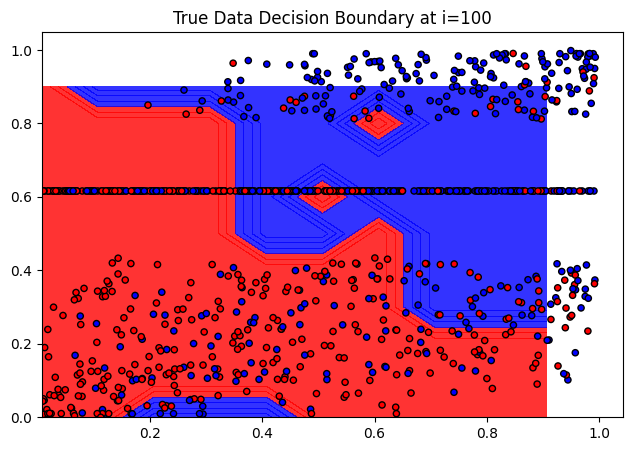

In [50]:
# Plot the true data
true_data = X.sample(1000).to_numpy()
X_true = true_data[:, :-1]
y_true = true_data[:, -1]

fig, ax = plt.subplots(figsize=(7.5, 5))
plot_decision_boundary(tabpfn_clf, X_true, y_true, ax, f"True Data Decision Boundary at i={i}")
plt.show()


In [14]:
syn_model.all_X_false_train[i].shape

(512, 8)

In [15]:
syn_model.preprocessor.mean_

array([0.49919427, 0.49791709, 0.49948768, 0.49907578, 0.49902792,
       0.50168655, 0.50105093])